# Dataset 
[UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.



# Load Data

Read the file with python open file and import into a panda data frame.

The data is a TSV (tab separated values)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('SMSSpamCollection', delimiter = '\t', names = ["Label", "Message"])

## Exploratory Data Analysis

1. Use panda data frame describe
2. Use panda groupby to be able to use describe for each label. 
3. Add a new column and store the length of the message into it

In [3]:
data.head()
data.describe()
data.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Data Visualization

1. Plot a histogram for the length of the messages with bin=50
2. Analyse the length of the messages with describe
3. Find max length of the messages and display it
4. Plot a histogram based on the label and message length  bins=50

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data['length'] = data.apply(lambda row: len(row.Message), axis = 1)

In [6]:
data.head()

,Label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd92deded10>]],
      dtype=object)

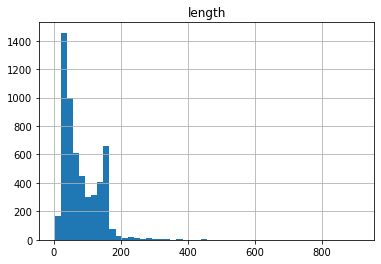

In [7]:
data.hist(['length'], bins = 50)

In [8]:
data.groupby('length').describe()

Label                  Message         \
       count unique  top freq   count unique   
length                                         
2          4      1  ham    4       4      1   
3          8      1  ham    8       8      4   
4          6      1  ham    6       6      3   
5         11      1  ham   11      11      2   
6          3      1  ham    3       3      3   
...      ...    ...  ...  ...     ...    ...   
588        2      1  ham    2       2      1   
611        1      1  ham    1       1      1   
629        1      1  ham    1       1      1   
790        1      1  ham    1       1      1   
910        1      1  ham    1       1      1   

                                                                
                                                      top freq  
length                                                          
2                                                      Ok    4  
3                                                     Ok.    4  
4                                                    Okie    4  
5                                                   Ok...   10  
6                                                  ALRITE    1  
...                                                   ...  ...  
588     Sad story of a Man - Last week was my b'day. M...    2  
611     How to Make a girl Happy? It's not at all diff...    1  
629     Indians r poor but India is not a poor country...    1  
790     The last thing i ever wanted to do was hurt yo...    1  
910     For me the love should start with attraction.i...    1  

[274 rows x 8 columns]

Label
ham     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
spam    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

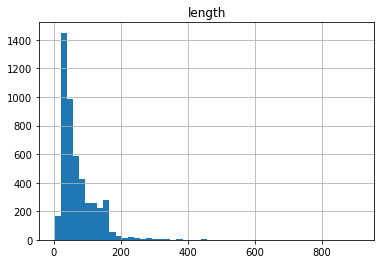

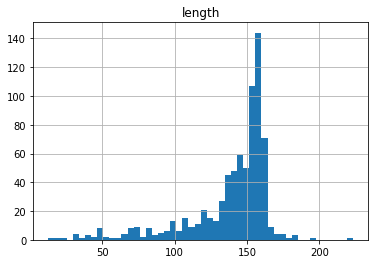

In [9]:
data.groupby('Label').hist(['length'], bins = 50)

In [10]:
data.describe().loc['max']
data['length'].max()

910

In [11]:
data.head()

,Label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
data[data['length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Text Pre-processing

1. Use python to remove removing punctuation and store in a variable called "nopunc"
2. Display the first 10 words from stopwords 
3. Remove stopwords from the nopunc
4. Implement the steps identified into a function
5. Use the function to apply the steps to all the messages 

### Removing punctuation

In [13]:
import string

mess = 'Sample message! Notice: it has punctuation.'
nopunc = mess.translate(str.maketrans('', '', string.punctuation))
# char for char in mess if char not in string.punctuation

# ''.join(nopunc)
#"" # <-Your code
print(nopunc)

Sample message Notice it has punctuation


### Stopwords

In [14]:
import nltk
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/swagmaster/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words("english"))

list(stop_words)[::10]

['but',
 'against',
 'now',
 'theirs',
 'over',
 'the',
 'have',
 "mustn't",
 'those',
 'won',
 'mustn',
 'i',
 'about',
 'itself',
 'while',
 'd',
 'not',
 'their']

In [17]:
nopunc2 = [word for word in nopunc.split() if word not in stop_words]
nopunc2 = ' '.join(nopunc2)

In [18]:
def text_process(mess):
    nopunc = mess.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words("english"))
    nopunc2 = [word for word in nopunc.split() if word.lower() not in stop_words]
#     nopunc2 = ' '.join(nopunc2)
    return nopunc2
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """

In [19]:
data['Message2'] = data.apply(lambda row: text_process(row.Message), axis = 1)

data.head()

,Label,Message,length,Message2
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


### Vectorization

1. Use sklearn CountVectorizer, and the function for text preprocessing (text_process)  vectorise the messages 
2. Take one text message index 3 and get its bag-of-words counts.
3.  Use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vect = CountVectorizer().fit(data['Message2'])
# CountVectorizer(analyzer = text_process).fit(data['Message'])

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
len(vect.vocabulary_)

In [35]:
vect.transform

AttributeError: 'CountVectorizer' object has no attribute 'shape'

### TF-IDF
term frequency-inverse document frequency
1. Use TfidfTransformer  and make a tfid transformer.
2. Check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`
3. Transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

##  Training a model using Naive Bayes

1. Use MultinomialNB from sklearn and build to model to classify the messages 
2. Try classifying a single random message and check your model 

In [8]:
from sklearn.naive_bayes import MultinomialNB

### Model Evaluation

1. Determine how well our model will do overall on the entire datase
2. Use classification_report from sklearn.metrics to evaluate the model

**You should never actually evaluate on the same dataset you train on!**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

## Train Test Split

1. Separate your dataset with 20% for test and 80% for training using train_test_split

In [9]:
from sklearn.model_selection import train_test_split

## Creating a Data Pipeline

1. Make a pipeline workflow and set up all the transformations with this order CountVectorizer, TfidfTransformer, MultinomialNB
2. use piple to train the model
3. Use classification_report to generate the report

In [10]:
from sklearn.pipeline import Pipeline